# DS-NYC-45 | Final Project 3: Exploratory Data Analysis

Load python libraries

In [82]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

%matplotlib inline
plt.style.use('ggplot')

In [47]:
df = pd.read_csv(os.path.join('project_dataset', 'trialer_data.csv'))


df.head() 

,users.user_id,leads.lead_created_at_date,leads.marketing_channel,leads.utm_campaign,leads.utm_content,...,user_promotions.promo_alias,user_promotions.parent_promo,user_promotions.promo_category,user_promotions.is_commitment_plan,users.is_converted
0,1032299,9/8/16,RAF,AUS Evergreen Plan Selection ($20/$20),personal_url,...,basehp,basehp,trial,No,0
1,1064327,9/21/16,RAF,AUS Evergreen Plan Selection ($20/$20),personal_url,...,friendbuy,RAF,social_referral,No,1
2,1014475,8/29/16,RAF,AUS Evergreen Plan Selection ($20/$20),personal_url,...,basehp,basehp,trial,No,0
3,1030044,9/5/16,RAF,AUS Evergreen Plan Selection ($20/$20),personal_url,...,no_promo,no_promo,no_promo,No,1
4,944974,8/9/16,RAF,AUS Evergreen Plan Selection ($20/$20),personal_url,...,19basetrial,basetrial,trial,No,0


In [48]:
df.describe() 

,leads.msa_id,user_cities.msa_id,users.is_converted
count,567331.000000,575780.000000,575804.000000
mean,9.773904,9.944463,0.654476
std,11.588755,11.689437,0.475539
min,1.000000,1.000000,0.000000
25%,NaN,NaN,0.000000
50%,NaN,NaN,1.000000
75%,NaN,NaN,1.000000
max,42.000000,42.000000,1.000000


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575804 entries, 0 to 575803
Data columns (total 30 columns):
users.user_id                              575804 non-null object
leads.lead_created_at_date                 575804 non-null object
leads.marketing_channel                    575804 non-null object
leads.utm_campaign                         117941 non-null object
leads.utm_content                          110686 non-null object
leads.utm_medium                           117792 non-null object
leads.utm_source                           118323 non-null object
leads.initial_url                          265050 non-null object
leads.msa_id                               567331 non-null float64
users.marketing_channel                    575804 non-null object
users.initial_url                          531730 non-null object
users.utm_campaign                         375740 non-null object
users.utm_content                          376473 non-null object
users.utm_medium              

In [50]:
df.isnull().sum()

users.user_id                              0
leads.lead_created_at_date                 0
leads.marketing_channel                    0
leads.utm_campaign                    457863
leads.utm_content                     465118
                                       ...  
user_promotions.promo_alias                0
user_promotions.parent_promo           31012
user_promotions.promo_category             1
user_promotions.is_commitment_plan         0
users.is_converted                         0
dtype: int64

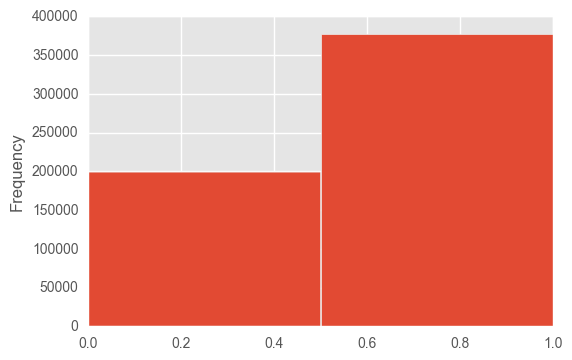

In [51]:
## Histogram on converted subscribers
df['users.is_converted'].plot(kind='hist', bins=2)


In [56]:
df['user_promotions.is_commitment_plan'].replace(['Yes', 'No'], [1, 0])
df['users.is_organic'].replace(['Yes', 'No'], [1, 0])
df['users.is_onboarded'].replace(['Yes', 'No'], [1, 0])


0         0
1         1
2         0
3         1
4         0
         ..
575799    0
575800    0
575801    0
575802    0
575803    0
Name: users.is_onboarded, dtype: int64

In [74]:
df.replace(('Yes', 'No'), (1, 0), inplace=True)

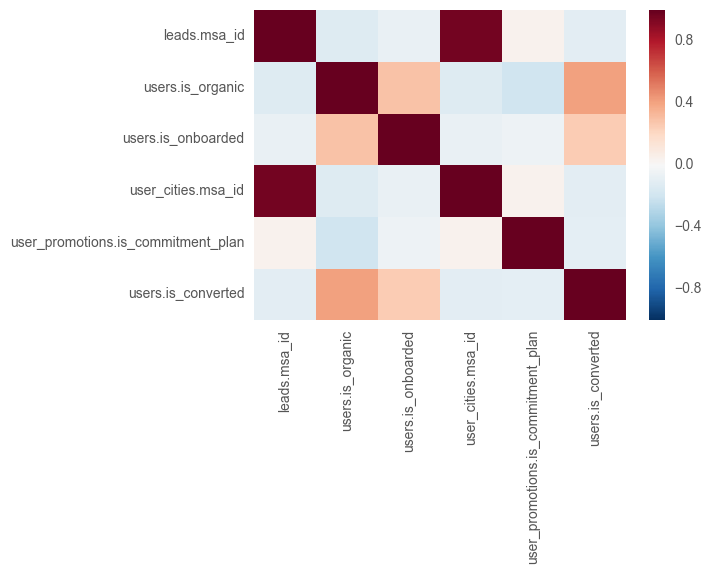

In [83]:
sns.heatmap(df.corr())

In [93]:
with pd.option_context('display.max_rows', 999, 'display.max_columns', 3):
    print df

       users.user_id        ...         users.is_converted
0            1032299        ...                          0
1            1064327        ...                          1
2            1014475        ...                          0
3            1030044        ...                          1
4             944974        ...                          0
5             953937        ...                          1
6            1029293        ...                          0
7            1039449        ...                          0
8             840365        ...                          0
9             842968        ...                          1
10            847722        ...                          0
11            864527        ...                          1
12            872528        ...                          0
13            830984        ...                          0
14            837393        ...                          1
15            841920        ...                         

In [94]:
pd.crosstab(df['leads.marketing_channel'],df['users.is_converted'], margins = True)

users.is_converted,0,1,All
leads.marketing_channel,,,
Direct Mail,583,509,1092
Display,465,1011,1476
Email,657,1703,2360
Mobile,1022,5994,7016
Other Paid,555,2235,2790
Other Unpaid,4964,7181,12145
Paid Social,24335,26162,50497
RAF,412,787,1199
SEM,8457,27273,35730


In [95]:
pd.crosstab(df['users.marketing_channel'],df['users.is_converted'], margins = True)

users.is_converted,0,1,All
users.marketing_channel,,,
Direct Mail,3570,3278,6848
Display,1080,1449,2529
Email,29693,68129,97822
IAF,11100,4003,15103
Mobile,93,24375,24468
Other Paid,586,1298,1884
Other Unpaid,18007,26461,44468
Paid Social,58268,45188,103456
RAF,10485,22229,32714
